In [1]:
# import  libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
file_path = 'data_files/QS World University Rankings 2025.csv'

# Load the dataset
uni_df = pd.read_csv(file_path, encoding='latin1')

print("Data loaded successfully!")
print(uni_df.head())

Data loaded successfully!
  RANK_2025 RANK_2024                              Institution_Name  \
0         1         1  Massachusetts Institute of Technology (MIT)    
1         2         6                       Imperial College London   
2         3         3                          University of Oxford   
3         4         4                            Harvard University   
4         5         2                       University of Cambridge   

         Location    Region SIZE FOCUS RES. STATUS  Academic_Reputation_Score  \
0   United States  Americas    M    CO   VH      B                      100.0   
1  United Kingdom    Europe    L    FC   VH      A                       98.5   
2  United Kingdom    Europe    L    FC   VH      A                      100.0   
3   United States  Americas    L    FC   VH      B                      100.0   
4  United Kingdom    Europe    L    FC   VH      A                      100.0   

   ... International_Faculty_Rank  International_Students_Sc

In [11]:
print("First 5 Rows:")
print(uni_df.head())


First 5 Rows:
  RANK_2025 RANK_2024                              Institution_Name  \
0         1         1  Massachusetts Institute of Technology (MIT)    
1         2         6                       Imperial College London   
2         3         3                          University of Oxford   
3         4         4                            Harvard University   
4         5         2                       University of Cambridge   

         Location    Region SIZE FOCUS RES. STATUS  Academic_Reputation_Score  \
0   United States  Americas    M    CO   VH      B                      100.0   
1  United Kingdom    Europe    L    FC   VH      A                       98.5   
2  United Kingdom    Europe    L    FC   VH      A                      100.0   
3   United States  Americas    L    FC   VH      B                      100.0   
4  United Kingdom    Europe    L    FC   VH      A                      100.0   

   ... International_Faculty_Rank  International_Students_Score  \
0  ..

In [13]:
# overview.
print("\nDataFrame Info:")
uni_df.info()


DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503 entries, 0 to 1502
Data columns (total 28 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   RANK_2025                             1503 non-null   object 
 1   RANK_2024                             1482 non-null   object 
 2   Institution_Name                      1503 non-null   object 
 3   Location                              1503 non-null   object 
 4   Region                                1503 non-null   object 
 5   SIZE                                  1503 non-null   object 
 6   FOCUS                                 1503 non-null   object 
 7   RES.                                  1503 non-null   object 
 8   STATUS                                1466 non-null   object 
 9   Academic_Reputation_Score             1503 non-null   float64
 10  Academic_Reputation_Rank              1503 non-null   object 
 11  

In [21]:
# columns to convert to numeric.
score_columns = [
    'Academic_Reputation_Score', 'Employer_Reputation_Score',
    'Faculty_Student_Score', 'Citations_per_Faculty_Score',
    'International_Faculty_Score', 'International_Students_Score',
    'International_Research_Network_Score', 'Employment_Outcomes_Score',
    'Sustainability_Score', 'Overall_Score'
]

for col in score_columns:
    uni_df[col] = pd.to_numeric(uni_df[col], errors='coerce')

In [23]:
# check for missing values
print("Missing values after converting scores to numeric:")
print(uni_df.isnull().sum())

for col in score_columns:
    median_val = uni_df[col].median()
    uni_df[col].fillna(median_val, inplace=True)

Missing values after converting scores to numeric:
RANK_2025                                 0
RANK_2024                                21
Institution_Name                          0
Location                                  0
Region                                    0
SIZE                                      0
FOCUS                                     0
RES.                                      0
STATUS                                   37
Academic_Reputation_Score                 0
Academic_Reputation_Rank                  0
Employer_Reputation_Score                 0
Employer_Reputation_Rank                  0
Faculty_Student_Score                     0
Faculty_Student_Rank                      0
Citations_per_Faculty_Score               0
Citations_per_Faculty_Rank                0
International_Faculty_Score             100
International_Faculty_Rank              100
International_Students_Score             58
International_Students_Rank              58
International_Research_Ne

C:\Users\New\AppData\Local\Temp\ipykernel_25292\174076520.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  uni_df[col].fillna(median_val, inplace=True)


In [27]:
# confirm cleaning worked.
print("\nMissing values after filling NaNs:")
print(uni_df.isnull().sum())


Missing values after filling NaNs:
RANK_2025                                 0
RANK_2024                                21
Institution_Name                          0
Location                                  0
Region                                    0
SIZE                                      0
FOCUS                                     0
RES.                                      0
STATUS                                   37
Academic_Reputation_Score                 0
Academic_Reputation_Rank                  0
Employer_Reputation_Score                 0
Employer_Reputation_Rank                  0
Faculty_Student_Score                     0
Faculty_Student_Rank                      0
Citations_per_Faculty_Score               0
Citations_per_Faculty_Rank                0
International_Faculty_Score               0
International_Faculty_Rank              100
International_Students_Score              0
International_Students_Rank              58
International_Research_Network_Score    

In [29]:
print("\nData types after cleaning:")
print(uni_df.dtypes)


Data types after cleaning:
RANK_2025                                object
RANK_2024                                object
Institution_Name                         object
Location                                 object
Region                                   object
SIZE                                     object
FOCUS                                    object
RES.                                     object
STATUS                                   object
Academic_Reputation_Score               float64
Academic_Reputation_Rank                 object
Employer_Reputation_Score               float64
Employer_Reputation_Rank                 object
Faculty_Student_Score                   float64
Faculty_Student_Rank                     object
Citations_per_Faculty_Score             float64
Citations_per_Faculty_Rank               object
International_Faculty_Score             float64
International_Faculty_Rank               object
International_Students_Score            float64
Internationa

In [31]:
# select only the numeric score columns for correlation matrix.
correlation_matrix = uni_df[score_columns].corr()

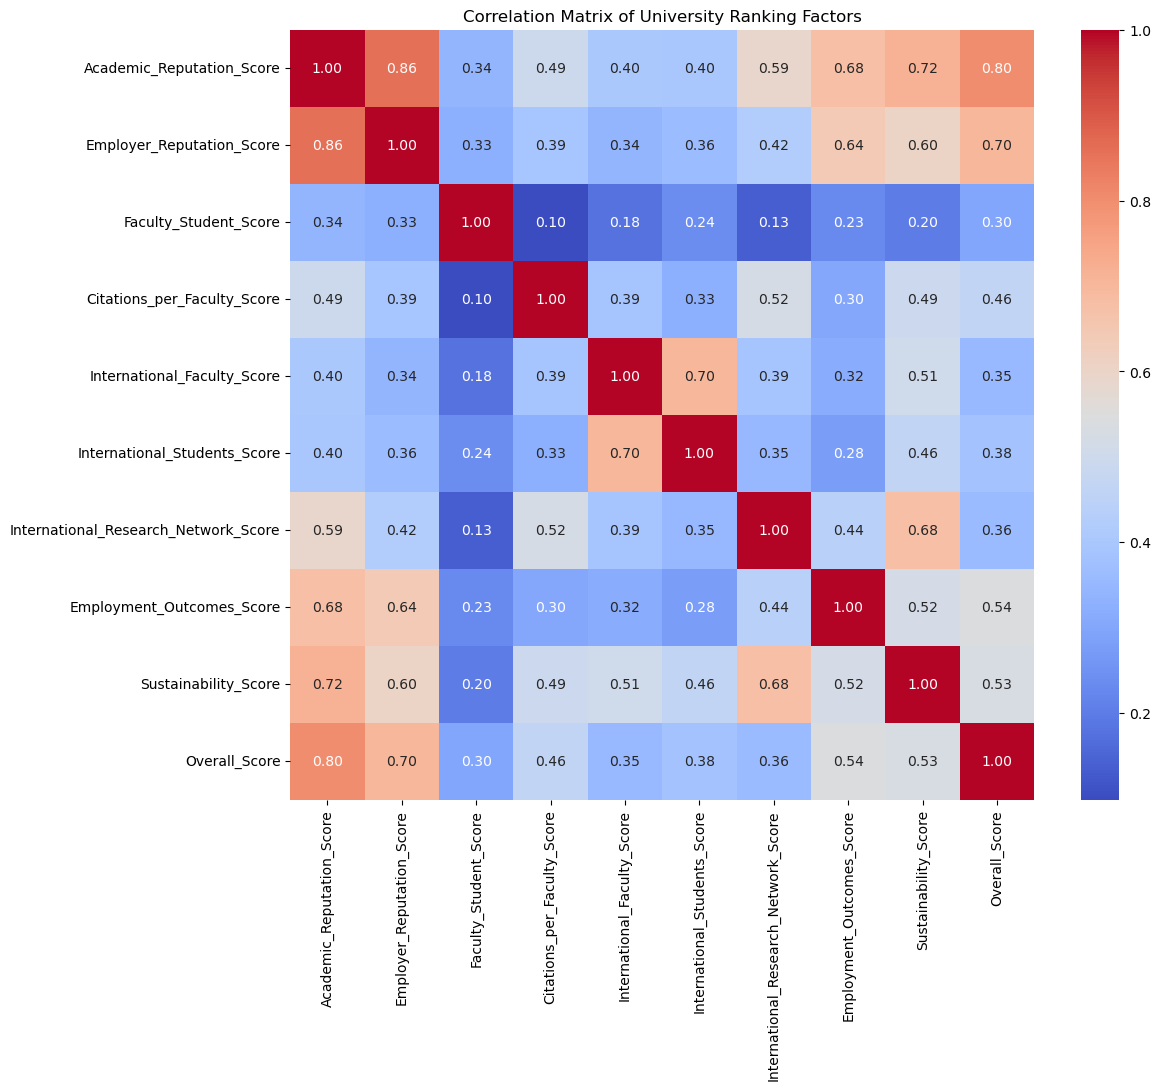

In [33]:
# plot the heatmap.
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of University Ranking Factors')
#plt.savefig('correlation_heatmap.png') # Save for the README
plt.show()

In [37]:
# split the string by the '-' and takes the first part.
uni_df['RANK_2025'] = uni_df['RANK_2025'].astype(str).str.split('-').str[0]

# convert the cleaned column to a numeric type.
# errors='coerce' to handle any remaining issues
uni_df['RANK_2025'] = pd.to_numeric(uni_df['RANK_2025'], errors='coerce')

# Filter for universities in the Top 100 (based on 2025 rank)
top_100_df = uni_df[uni_df['RANK_2025'] <= 100]

# Count the number of top universities per country.
country_counts = top_100_df['Location'].value_counts().head(10)

C:\Users\New\AppData\Local\Temp\ipykernel_25292\2114384961.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_counts.values, y=country_counts.index, palette='magma')


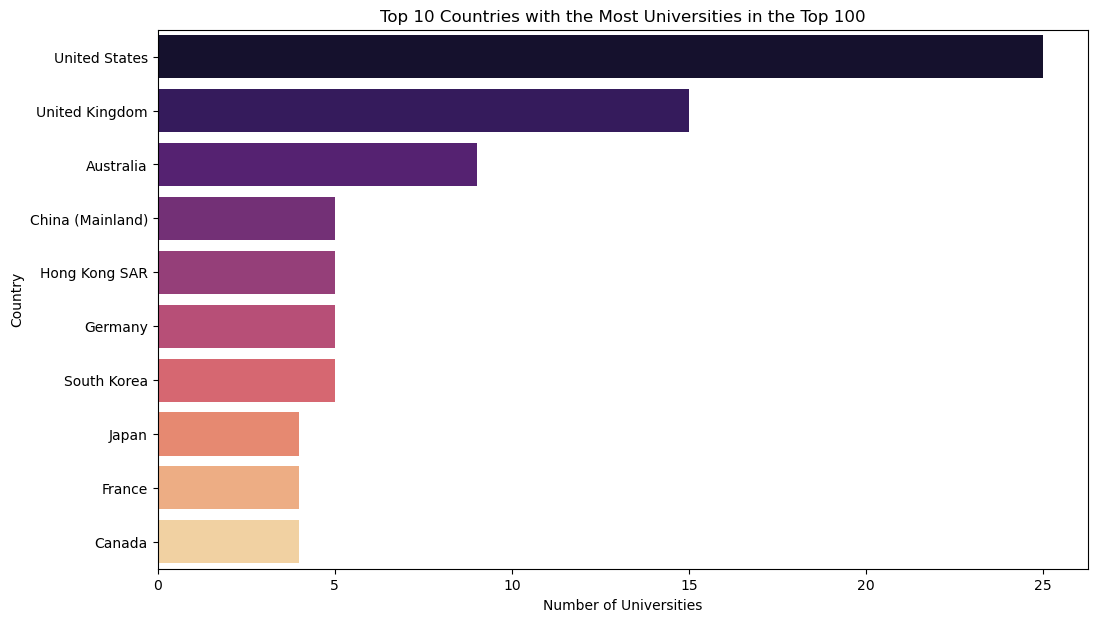

In [39]:
# Plot the results.
plt.figure(figsize=(12, 7))
sns.barplot(x=country_counts.values, y=country_counts.index, palette='magma')
plt.title('Top 10 Countries with the Most Universities in the Top 100')
plt.xlabel('Number of Universities')
plt.ylabel('Country')
#plt.savefig('top_countries.png')
plt.show()

The bar chart shows that the United States and the United Kingdom dominate the top 100 rankings.

This visualization is great for showing regional dominance in higher education and can lead to further questions about why these countries are so successful.